In [ ]:
# This cell is for Colab
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir an2dl_1
%cd an2dl_1
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c anndl-2020-vqa
!unzip /content/an2dl_1/anndl-2020-vqa.zip

     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=4ba1ab8a4aba59bd6f68ddb5a458abda707d86c98f94c446f455d4d03303b0d4
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
/content/an2dl_1


Streaming output truncated to the last 5000 lines.
  inflating: VQA_Dataset/Images/5390.png  
  inflating: VQA_Dataset/Images/5391.png  
  inflating: VQA_Dataset/Images/5392.png  
  inflating: VQA_Dataset/Images/5393.png  
  inflating: VQA_Dataset/Images/5394.png  
  inflating: VQA_Dataset/Images/5395.png  
  inflating: VQA_Dataset/Images/5396.png  
  inflating: VQA_Dataset/Images/5397.png  
  inflating: VQA_Dataset/Images/5398.png  
  inflating: VQA_Dataset/Images/5399.png  
  inflating: VQA_Dataset/Images/54.png  
  inflating: VQA_Dataset/Images/540.png  
  inflating: VQA_Dataset/Images/5400.png  
  inflating: VQA_Dataset/Images/5401.png  
  inflating: VQA_Dataset/Images/5402.png  
  inflating: VQA_Dataset/Images/5403.png  
  inflating: VQA_Dataset/Images/5404.png  
  inflating: VQA_Dataset/Images/5405.png  
  inflating: VQA_Dataset/Images/5406.png  
  inflating: VQA_Dataset/Images/5407.png  
  inflating: VQA_Dataset/Images/5408.png  
  inflating: VQA_Dataset/Images/5409.png  
  infl

In [ ]:
# This cell is for Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os, sys
import tensorflow as tf
import numpy as np
import pandas as pd
import json

import random, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as L
from tensorflow.keras.applications import ResNet152V2, InceptionResNetV2, InceptionV3, Xception, VGG19, Xception, DenseNet201, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

SEED = 1234
tf.random.set_seed(SEED)  
np.random.seed(SEED)

# Get current working directory
cwd = os.getcwd()


In [ ]:
import cv2 
# Create generators to read images from dataset directory
# -------------------------------------------------------
dataset_dir = '/content/an2dl_1/VQA_Dataset'


# Batch size
bs = 32
EPOCHS = 60

# img shape
img_h = 200
img_w = 450
num_classes = 58

questions = []
answers = []
i = 0
with open(os.path.join(dataset_dir, "train_questions_annotations.json")) as f:
  dic = json.load(f)
images = np.empty((len(dic.keys()), img_h, img_w, 3), dtype=np.uint8)
for key in dic:
  # Limit train data to test in reasonable time
  #if i < 2000000:
  if i % 100 == 0:
      print(i)
  image = cv2.imread(dataset_dir + "/Images/" + dic[key]["image_id"] + ".png")
  image = np.array(cv2.resize(image, (img_w, img_h)))
  question = dic[key]["question"]
  answer = dic[key]["answer"]   
  images[i] = image
  questions.append(question)
  answers.append(answer)
  i += 1 
  #else:
    #break

print(images.shape)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
labels_dict = {
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        'apple': 6,
        'baseball': 7,
        'bench': 8,
        'bike': 9,
        'bird': 10,
        'black': 11,
        'blanket': 12,
        'blue': 13,
        'bone': 14,
        'book': 15,
        'boy': 16,
        'brown': 17,
        'cat': 18,
        'chair': 19,
        'couch': 20,
        'dog': 21,
        'floor': 22,
        'food': 23,
        'football': 24,
        'girl': 25,
        'grass': 26,
        'gray': 27,
        'green': 28,
        'left': 29,
        'log': 30,
        'man': 31,
        'monkey bars': 32,
        'no': 33,
        'nothing': 34,
        'orange': 35,
        'pie': 36,
        'plant': 37,
        'playing': 38,
        'red': 39,
        'right': 40,
        'rug': 41,
        'sandbox': 42,
        'sitting': 43,
        'sleeping': 44,
        'soccer': 45,
        'squirrel': 46,
        'standing': 47,
        'stool': 48,
        'sunny': 49,
        'table': 50,
        'tree': 51,
        'watermelon': 52,
        'white': 53,
        'wine': 54,
        'woman': 55,
        'yellow': 56,
        'yes': 57
}

for i in range(0, len(answers)):
  answers[i] = labels_dict[answers[i]]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_NUM_WORDS = 20000

q_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
q_tokenizer.fit_on_texts(questions)
q_tokenized = q_tokenizer.texts_to_sequences(questions)

q_wtoi = q_tokenizer.word_index

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_q_length = max(len(sentence) for sentence in q_tokenized)

# Need to add pad so all sentences have same lenght
q_encoder_inputs = pad_sequences(q_tokenized, maxlen=max_q_length)

q_encoder_inputs = np.array(q_encoder_inputs)
answers = np.array(answers)
answers = tf.one_hot(answers, num_classes)

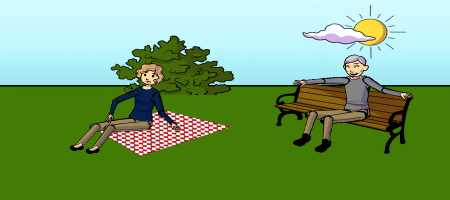

Who looks happier?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


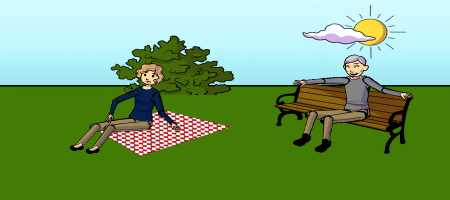

Where is the woman sitting?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


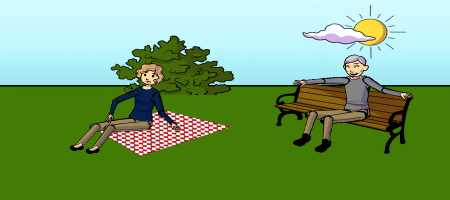

Where is the man sitting?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


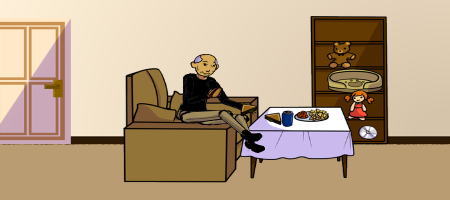

Is this man hungry?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(58,), dtype=float32)


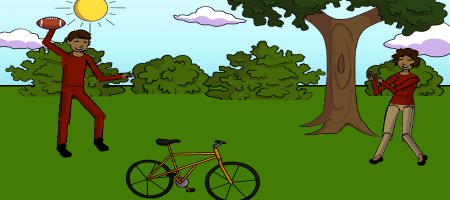

Who is holding the football?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


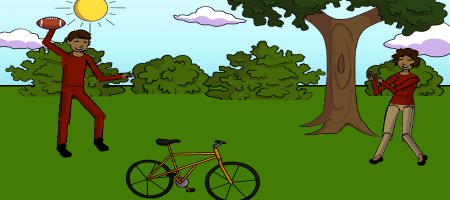

Does this woman tie her shoes in the morning?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


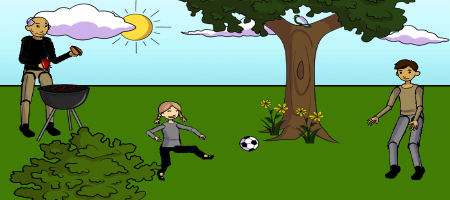

Is the man eating a hotdog?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(58,), dtype=float32)


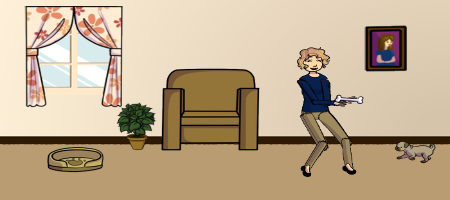

What is the predominant color of the room?
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(58,), dtype=float32)


In [ ]:
from google.colab.patches import cv2_imshow
# Visualize image, question and anwer

for i in range(0, 8):
  cv2_imshow(images[i])
  print(questions[i])
  print(answers[i])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Flatten, Embedding, Concatenate, concatenate, Conv2D, MaxPool2D
from keras.utils import plot_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import h5py

embedding_dim = 32
dropout_rate = 0.2
token_input = tf.keras.Input(max_q_length, dtype='int32')
image_input = tf.keras.Input([img_h, img_w, 3], dtype='int32')

encoder_input = tf.keras.Input(shape=[max_q_length])
# Mask zero: layers following embedding will not output values for padding
print("Creating text model...")
w2v_model1 = tf.keras.layers.Embedding(len(q_wtoi)+1, embedding_dim, input_length=max_q_length, mask_zero=True)(token_input)
w2v_model2 = LSTM(units=512, return_sequences=True, input_shape=(max_q_length, embedding_dim))(w2v_model1)
w2v_model3 = Dropout(dropout_rate)(w2v_model2)
w2v_model4 = LSTM(units=512, return_sequences=False)(w2v_model3)
w2v_model5 = Dropout(dropout_rate)(w2v_model4)
w2v_model6 = Dense(1024, activation='relu')(w2v_model5)
w2v_model = Model(token_input, w2v_model6)
'''w2v_model = Sequential()
w2v_model.add(tf.keras.layers.Embedding(len(q_wtoi)+1, embedding_dim, input_length=max_q_length, mask_zero=True))
w2v_model.add(LSTM(units=512, return_sequences=True, input_shape=(max_q_length, embedding_dim)))
w2v_model.add(Dropout(dropout_rate))
w2v_model.add(LSTM(units=512, return_sequences=False))
w2v_model.add(Dropout(dropout_rate))
w2v_model.add(Dense(1024, activation='relu'))'''

print("Creating image model...")
img_model1 = InceptionResNetV2(input_shape=(img_h, img_w, 3), weights='imagenet', include_top=False)(image_input)
img_model2 = GlobalAveragePooling2D()(img_model1)
img_model3 = Flatten()(img_model2)
img_model4 = Dense(1024, activation='relu')(img_model3)
img_model = Model(image_input, img_model4)
'''img_model = tf.keras.Sequential([
    Xception(input_shape=(250, 500, 3), weights='imagenet', include_top=False),
    # L.GlobalAveragePooling2D(),
    Flatten(),
    Dense(1024, activation='relu')])'''

print("Merging final model...")

concat = concatenate([w2v_model.layers[-1].output, img_model.layers[-1].output], name='Concatenate')
final_model_output1 = Dropout(dropout_rate)(concat)
final_model_output2 = Dense(1024, activation='relu')(final_model_output1)
final_model_output3 = Dropout(dropout_rate)(final_model_output2)
final_model_output4 = Dense(num_classes, activation='softmax')(final_model_output3)
model = Model(inputs=[token_input, image_input], outputs=final_model_output4)
'''model = tf.keras.Sequential(input_shape=[len(q_wtoi)+1, [img_h, img_w, 3]])
model.add(Concatenate([w2v_model, img_model]))
model.add(Dropout(dropout_rate))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))'''


#model = Model(inputs=[text_input, image_input], outputs=model)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Creating text model...


"w2v_model = Sequential()\nw2v_model.add(tf.keras.layers.Embedding(len(q_wtoi)+1, embedding_dim, input_length=max_q_length, mask_zero=True))\nw2v_model.add(LSTM(units=512, return_sequences=True, input_shape=(max_q_length, embedding_dim)))\nw2v_model.add(Dropout(dropout_rate))\nw2v_model.add(LSTM(units=512, return_sequences=False))\nw2v_model.add(Dropout(dropout_rate))\nw2v_model.add(Dense(1024, activation='relu'))"

Creating image model...
219062272/219055592 [==============================] - 5s 0us/step


"img_model = tf.keras.Sequential([\n    Xception(input_shape=(250, 500, 3), weights='imagenet', include_top=False),\n    # L.GlobalAveragePooling2D(),\n    Flatten(),\n    Dense(1024, activation='relu')])"

Merging final model...


"model = tf.keras.Sequential(input_shape=[len(q_wtoi)+1, [img_h, img_w, 3]])\nmodel.add(Concatenate([w2v_model, img_model]))\nmodel.add(Dropout(dropout_rate))\nmodel.add(Dense(1024, activation='tanh'))\nmodel.add(Dropout(dropout_rate))\nmodel.add(Dense(num_classes, activation='softmax'))"

In [ ]:
# Visualize created model as a table
#model.build([text_input, image_input])
model.summary()

# Visualize initialized weights
#model.weights

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 21)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 21, 32)       148512      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 21, 512)      1116160     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 200, 450, 3) 0                                            
____________________________________________________________________________________________

In [ ]:
# Optimization params
# -------------------

# Loss
loss = tf.keras.losses.CategoricalCrossentropy()

# learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Validation metrics
# ------------------

metrics = ['accuracy']
# ------------------



In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir /content/drive/My\ Drive/Keras3/classification_experiments/

In [ ]:
import os
from datetime import datetime


cwd = os.getcwd()

exps_dir = '/content/drive/My Drive/NN_Homework_3/VQA_experiments'
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'Inc'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'Ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'Tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=1)  # if 1 shows weights histograms
callbacks.append(tb_callback)
#callbacks.append(lr_callback)

# Early Stopping
# --------------
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    callbacks.append(es_callback)

In [ ]:
# Replace model1 with other models and compile 

model.fit(x=[q_encoder_inputs, images],
          y=answers,
          epochs=EPOCHS,
          batch_size=bs, 
          validation_split=0.2, 
          callbacks=callbacks)

Epoch 1/60
1471/1471 [==============================] - 633s 411ms/step - loss: 0.7929 - accuracy: 0.6781 - val_loss: 1.0749 - val_accuracy: 0.6047
Epoch 2/60
1471/1471 [==============================] - 596s 405ms/step - loss: 0.7643 - accuracy: 0.6847 - val_loss: 1.0344 - val_accuracy: 0.6234
Epoch 3/60
1471/1471 [==============================] - 596s 405ms/step - loss: 0.7493 - accuracy: 0.6928 - val_loss: 1.0680 - val_accuracy: 0.6203
Epoch 4/60
1471/1471 [==============================] - 596s 405ms/step - loss: 0.7221 - accuracy: 0.7006 - val_loss: 1.0535 - val_accuracy: 0.6097
Epoch 5/60
1471/1471 [==============================] - 595s 405ms/step - loss: 0.7127 - accuracy: 0.7078 - val_loss: 1.1159 - val_accuracy: 0.6110
Epoch 6/60
1471/1471 [==============================] - 596s 405ms/step - loss: 0.6928 - accuracy: 0.7151 - val_loss: 1.1627 - val_accuracy: 0.6133
Epoch 7/60
1471/1471 [==============================] - 596s 405ms/step - loss: 0.6739 - accuracy: 0.7220 - val_

In [ ]:
# Load
model.load_weights('/content/drive/MyDrive/NN_Homework_3/IncResNetV2/best.ckpt')

In [ ]:
# Test
res_dir = os.path.join(exp_dir, 'Results')
if not os.path.exists(res_dir):
    os.makedirs(res_dir)
def create_csv(results, results_dir=res_dir):

    csv_fname = 'results_'
    csv_fname += datetime.now().strftime('%b%d_%H-%M-%S') + '.csv'

    with open(os.path.join(results_dir, csv_fname), 'w') as f:

        f.write('Id,Category\n')

        for key, value in results.items():
            f.write(key + ',' + str(value) + '\n')


questions = []
with open(os.path.join(dataset_dir, "test_questions.json")) as f:
  dic = json.load(f)
print(len(dic.keys()))
images = np.empty((len(dic.keys()), img_h, img_w, 3), dtype=np.uint8)
i = 0
for key in dic:
  image = cv2.imread(dataset_dir + "/Images/" + dic[key]["image_id"] + ".png")
  image = np.array(cv2.resize(image, (img_w, img_h)))
  question = dic[key]["question"] 
  images[i] = image
  questions.append(question)
  i += 1

'''MAX_NUM_WORDS = 20000
q_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
q_tokenizer.fit_on_texts(questions)'''
q_tokenized = q_tokenizer.texts_to_sequences(questions)
q_wtoi = q_tokenizer.word_index

# Use max_q_lenght of train to avoid shape problems
# max_q_length = max(len(sentence) for sentence in q_tokenized)
q_encoder_inputs = pad_sequences(q_tokenized, maxlen=max_q_length)
q_encoder_inputs = np.array(q_encoder_inputs)

results = {}
i = 0

for key in dic:
  print(i)
  image = images[i]
  imageb = image[np.newaxis, ...]
  prediction = np.argmax(model.predict([q_encoder_inputs[i].reshape(1,-1), imageb]))
  results[key] = prediction
  i += 1

create_csv(results)

6372


'MAX_NUM_WORDS = 20000\nq_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)\nq_tokenizer.fit_on_texts(questions)'

Streaming output truncated to the last 5000 lines.
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561